In [1]:
import numpy as np
import pandas as pd
import json

In [2]:
from shapely.geometry import Point,Polygon


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls
import os
os.chdir("drive/My Drive/Homeless-dataset/")
!ls

drive  sample_data
datadesk-homeless-sleeping-restrictions  LA-Geo-Data
HomelessLA				 rebeccaebarnes-Homelessness


In [5]:
with open("datadesk-homeless-sleeping-restrictions/polygons/la_homeless_facilities.geojson") as f:
  facilities = json.load(f)


In [6]:
data = []
for row in  facilities["features"]:
  org = row["properties"]["organization"]
  adr = row["properties"]["address"]
  lat = row["properties"]["latitude"]
  lon = row["properties"]["longitude"]
  data.append({
      "organization":org,
      "address" : adr,
      "latitude" : lat,
      "longitude" : lon

  })

homeless_facilities_df = pd.DataFrame(data)
homeless_facilities_df.head()

,organization,address,latitude,longitude
0,Downtown Women's Center,"442 San Pedro St., Los Angeles, CA 90013",34.04464,-118.24340
1,Home At Last Community Development Corporation,"5165 Vermont Ave, Los Angeles, CA 90037, USA",33.99549,-118.29180
2,"First To Serve, Inc.","202 W 91st St, Los Angeles, CA 90003, USA",33.95356,-118.27617
3,"First To Serve, Inc.","200 W 91st St, Los Angeles, CA 90003, USA",33.95357,-118.27608
4,Casa Azul,"1920 3rd Street, Los Angeles, CA 90057",34.06197,-118.27094


In [7]:
tract_df = pd.read_csv("datadesk-homeless-sleeping-restrictions/neighborhoods/tract-neighborhood-allocation.csv",dtype = {"tract":str})
tract_df["tract"] = tract_df["tract"].str.slice(start=-6)

tract_df.head()

,tract,name,tract_percent
0,101110,Tujunga,1.000000
1,101122,Sunland,0.003235
2,101122,Tujunga,0.996765
3,101210,Tujunga,1.000000
4,101220,Tujunga,1.000000


In [8]:
homeless_count_df = pd.read_excel("datadesk-homeless-sleeping-restrictions/homelesscount/homeless-count-2019-results-by-census-tract.xlsx",
                                  sheet_name = 'Counts_by_Tract',
                                  dtype = {"tract":str})
# homeless_count_df["tract"] = homeless_count_df["tract"].apply(lambda x : )
homeless_count_df.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,tract,Year,City,LACity,Community_Name,SPA,SD,CD,DemogSurvCt,YouthSurvCt,...,totSHYouthSingYouth,totSHYouthFamHH,totSHYouthFamMem,totSHYouthUnaccYouth,totUnsheltPeople,totESPeople,totTHPeople,totSHPeople,totSheltPeople,totPeople
0,101110,2019,Los Angeles,1,Tujunga,2,5,7,0,1,...,0,0,0,0,12.614,0,0.0,0,0,12.614
1,101122,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,0,0,1.000,0,0.0,0,0,1.000
2,101210,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,0,0,14.517,0,0.0,0,0,14.517
3,101220,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,0,0,24.058,0,0.0,0,0,24.058
4,101300,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,0,0,9.278,0,0.0,0,0,9.278


In [9]:
merged_df = pd.merge(homeless_count_df,tract_df)
merged_df.head()

,tract,Year,City,LACity,Community_Name,SPA,SD,CD,DemogSurvCt,YouthSurvCt,...,totSHYouthFamMem,totSHYouthUnaccYouth,totUnsheltPeople,totESPeople,totTHPeople,totSHPeople,totSheltPeople,totPeople,name,tract_percent
0,101110,2019,Los Angeles,1,Tujunga,2,5,7,0,1,...,0,0,12.614,0,0.0,0,0,12.614,Tujunga,1.000000
1,101122,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,1.000,0,0.0,0,0,1.000,Sunland,0.003235
2,101122,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,1.000,0,0.0,0,0,1.000,Tujunga,0.996765
3,101210,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,14.517,0,0.0,0,0,14.517,Tujunga,1.000000
4,101220,2019,Los Angeles,1,Tujunga,2,5,7,0,0,...,0,0,24.058,0,0.0,0,0,24.058,Tujunga,1.000000


In [10]:
merged_df['totUnsheltPeoplePortion'] = merged_df['totUnsheltPeople'] * merged_df['tract_percent']
totalsbyhood = merged_df.groupby('name')\
[['totUnsheltPeoplePortion']]\
.sum()\
.reset_index()\
.sort_values('totUnsheltPeoplePortion', ascending=False)
totalsbyhood.head()

,name,totUnsheltPeoplePortion
23,Downtown,2477.656050
86,Skid Row,1560.699515
109,Westlake,1239.655588
47,Hollywood,1191.539096
99,Venice,1091.534800


In [11]:
merged_df.columns

Index(['tract', 'Year', 'City', 'LACity', 'Community_Name', 'SPA', 'SD', 'CD',
       'DemogSurvCt', 'YouthSurvCt', 'SheltHmisCt', 'ShelterCountAny',
       'StreetCountAny', 'totStreetSingAdult', 'totStreetFamHH',
       'totStreetFamMem', 'totCars', 'totVans', 'totCampers', 'totTents',
       'totMakeshift', 'totCarPeople', 'totVanPeople', 'totCamperPeople',
       'totTentPeople', 'totMakeshiftPeople', 'FamCarHH', 'FamVanHH',
       'FamCamperHH', 'FamTentHH', 'FamMakeshiftHH', 'FamCarPeople',
       'FamVanPeople', 'FamCamperPeople', 'FamTentPeople',
       'FamMakeshiftPeople', 'IndCarPeople', 'IndVanPeople', 'IndCamperPeople',
       'IndTentPeople', 'IndMakeshiftPeople', 'totESAdultSingAdult',
       'totESAdultFamHH', 'totESAdultFamMem', 'totESYouthSingYouth',
       'totESYouthFamHH', 'totESYouthFamMem', 'totESYouthUnaccYouth',
       'totTHAdultSingAdult', 'totTHAdultFamHH', 'totTHAdultFamMem',
       'totTHYouthSingYouth', 'totTHYouthFamHH', 'totTHYouthFamMem',
       'totTH

In [12]:
with open("datadesk-homeless-sleeping-restrictions/neighborhoods/custom-la-hoods-skid-row.geojson") as f:
  neighbs = json.load(f)

In [13]:
neighbs.keys()

dict_keys(['type', 'crs', 'features'])

In [14]:
data = []
for row in  neighbs["features"]:
  # print(row)
  name = row["properties"]["name"]
  coordinates = row["geometry"]["coordinates"][0][0]
  data.append({
      "name":name,
      "coordinates" : coordinates
  })
neigh_df = pd.DataFrame(data)
neigh_df.head()

,name,coordinates
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11..."
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11..."
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340..."
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1..."
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11..."


In [14]:
neigh_df.loc[113,:]

name                                                    Downtown
coordinates    [[-118.24020700000014, 34.05871099912385], [-1...
Name: 113, dtype: object

In [15]:
all_shelters = []
for i in range(len(neigh_df)):
  coords = neigh_df.loc[i,"coordinates"]
  shelters = []
  if coords:
    poly = Polygon(coords)
    for j in range(len(homeless_facilities_df)):
      point = Point(homeless_facilities_df.loc[j,"longitude"], homeless_facilities_df.loc[j,"latitude"])
      if point.within(poly):
        shelters.append(homeless_facilities_df.loc[j,"organization"])
  all_shelters.append(shelters)
neigh_df["shelters"] = all_shelters
neigh_df.head()

,name,coordinates,shelters
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[]
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[]
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[]
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[]
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[]


In [ ]:
#shelter : shelter-name, lat long
#neighb : com-name, boundary of coordinates
#whicgh neighb has which shelter 
#neigb : [list of shelters]

In [16]:
nearest_shelters = []
for i in range(len(neigh_df)):
  coords = neigh_df.loc[i,"coordinates"]
  poly = Polygon(coords)
  distances = []

  for j in range(len(homeless_facilities_df)):
    point = Point(homeless_facilities_df.loc[j,"longitude"], homeless_facilities_df.loc[j,"latitude"])
    distances.append([j,poly.distance(point)])

  distances.sort(key = lambda x :x[1])
  # print(distances)
  nearest_index = distances[0][0]
  # print(nearest_index)
  nearest_shelters.append(homeless_facilities_df.loc[nearest_index,"organization"])

#   all_shelters.append(shelters)
neigh_df["nearest_shelters"] = nearest_shelters
neigh_df.head()

,name,coordinates,shelters,nearest_shelters
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope


In [17]:
with open("LA-Geo-Data/street-lights.geojson") as f:
  street_lights_data = json.load(f)

with open("LA-Geo-Data/Metro_Stations.geojson") as f:
  metro_stations_data = json.load(f)

with open("LA-Geo-Data/hospitals.json") as f:
  hospitals_data = json.load(f)

In [25]:
hospitals_data["features"][0]

all_hosps = []
for x in hospitals_data["features"]:
  # print(x)
  all_hosps.append([x["attributes"]["longitude"],x["attributes"]["latitude"]])

num_hosps = []

for i in range(len(neigh_df)):
  coords = neigh_df.loc[i,"coordinates"]
  count = 0
  poly = Polygon(coords)
  # print(poly)
  distances = []
  for p in all_hosps:
    point = Point(p)
    if point.within(poly):
      count+=1
    # if count:
    #   print("yay")

  num_hosps.append(count)
neigh_df["num_hosps"] = num_hosps
neigh_df.head()

,name,coordinates,shelters,nearest_shelters,num_hosps
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted,0
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission,0
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope,0
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul,0
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope,0


In [26]:
# metro_stations_data["features"][0]
data = []
for row in  metro_stations_data["features"]:
  # print(row)
  name = row["properties"]["Name"]
  coordinates = row["geometry"]["coordinates"]
  data.append({
      "name":name,
      "coordinates" : coordinates
  })
metro_df = pd.DataFrame(data)
metro_df.head()

,name,coordinates
0,Union Station,"[-118.23644047614594, 34.05605495666247]"
1,Long Beach Transit Mall,"[-118.19268905645744, 33.76806896785078]"
2,1st Street Metro Station,"[-118.1898320564236, 33.768077967619455]"
3,Pacific Metro Station,"[-118.19371505652927, 33.7721369675158]"
4,5th Street Metro Station,"[-118.18936405626407, 33.77234796712981]"


In [27]:
street_lights = []
for row in street_lights_data["features"]:
  street_lights.append(row["geometry"]["coordinates"])

# street_lights

In [28]:
num_street_lights = []

for i in range(len(neigh_df)):
  coords = neigh_df.loc[i,"coordinates"]
  count = 0
  poly = Polygon(coords)
  # print(poly)
  distances = []
  for p in street_lights:
    point = Point(p)
    distances.append(poly.distance(point))

    distances.sort()
    # print(distances)
    # print(point)
    if point.within(poly):
      count+=1
    if count:
      print("yay")

  num_street_lights.append(count)
neigh_df["num_street_lights"] = num_street_lights
neigh_df.head()

,name,coordinates,shelters,nearest_shelters,num_hosps,num_street_lights
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted,0,0
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission,0,0
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope,0,0
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul,0,0
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope,0,0


In [29]:
num_metro = []

for i in range(len(neigh_df)):
  coords = neigh_df.loc[i,"coordinates"]
  count = 0
  poly = Polygon(coords)
  # print(poly)
  distances = []
  for j in range(len(metro_df)):
    point = Point(metro_df.loc[j,"coordinates"])
    if point.within(poly):
      count+=1
    # if count:
    #   print("yay")

  num_metro.append(count)

neigh_df["num_metro"] = num_metro
neigh_df.head()

,name,coordinates,shelters,nearest_shelters,num_hosps,num_street_lights,num_metro
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted,0,0,0
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission,0,0,0
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope,0,0,0
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul,0,0,0
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope,0,0,2


In [30]:
with open("datadesk-homeless-sleeping-restrictions/polygons/la_city_county_parks.geojson") as f:
  parks = json.load(f)


In [31]:
parks["features"][0]

data = []
for row in  parks["features"]:
  # print(row)
  access_type = row["properties"]["ACCESS_TYP"]
  coordinates = row["geometry"]["coordinates"][0][0]
  data.append({
      "access_type":access_type,
      "coordinates" : coordinates
  })
parks_df = pd.DataFrame(data)
parks_df.head()

,access_type,coordinates
0,Open Access,"[[-118.66711900095216, 34.19880299944759], [-1..."
1,Open Access,"[[-118.34933000132162, 34.13060099887141], [-1..."
2,Open Access,"[[-118.16828400084721, 34.098197998973696], [-..."
3,Open Access,"[[-118.18067200090994, 34.0756779990524], [-11..."
4,Open Access,"[[-118.24566500093819, 33.98954499902613], [-1..."


In [32]:
parks_df["access_type"].replace("Unknown Access","Public Access", inplace=True)
parks_df["access_type"].replace("Open Access","Public Access", inplace=True)
parks_df.head()

,access_type,coordinates
0,Public Access,"[[-118.66711900095216, 34.19880299944759], [-1..."
1,Public Access,"[[-118.34933000132162, 34.13060099887141], [-1..."
2,Public Access,"[[-118.16828400084721, 34.098197998973696], [-..."
3,Public Access,"[[-118.18067200090994, 34.0756779990524], [-11..."
4,Public Access,"[[-118.24566500093819, 33.98954499902613], [-1..."


In [33]:
parks_df = parks_df[parks_df["access_type"]=="Public Access"]
parks_df.access_type.value_counts()

Public Access    718
Name: access_type, dtype: int64

In [34]:
parks_df.reset_index(inplace = True)
parks_df.head()

,index,access_type,coordinates
0,0,Public Access,"[[-118.66711900095216, 34.19880299944759], [-1..."
1,1,Public Access,"[[-118.34933000132162, 34.13060099887141], [-1..."
2,2,Public Access,"[[-118.16828400084721, 34.098197998973696], [-..."
3,3,Public Access,"[[-118.18067200090994, 34.0756779990524], [-11..."
4,4,Public Access,"[[-118.24566500093819, 33.98954499902613], [-1..."


In [35]:
num_parks = []

for i in range(len(neigh_df)):
  coords = neigh_df.loc[i,"coordinates"]
  count = 0
  poly1 = Polygon(coords)
  # print(poly)
  distances = []
  for j in range(len(parks_df)):
    # print(parks_df.loc[j,"coordinates"])
    poly2 = Polygon(parks_df.loc[j,"coordinates"])
    if poly1.contains(poly2) or poly1.intersects(poly2):
      count+=1
    # if count:
    #   print("yay")

  num_parks.append(count)

neigh_df["num_parks"] = num_parks
neigh_df.head()

,name,coordinates,shelters,nearest_shelters,num_hosps,num_street_lights,num_metro,num_parks
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted,0,0,0,2
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission,0,0,0,2
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope,0,0,0,2
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul,0,0,0,3
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope,0,0,2,6


In [36]:
with open("datadesk-homeless-sleeping-restrictions/polygons/la_city_special_venues.geojson") as f:
  svenues = json.load(f)


In [69]:
len(svenues["features"])



9

In [37]:
svenues["features"][0]

svenues_list = []
for row in  svenues["features"]:
  coordinates = row["geometry"]["coordinates"][0]
  coordinates = [x[:2] for x in coordinates]
  # print(coordinates)
  svenues_list.append( coordinates)
svenues_list[0]

[[-118.3224321, 34.1017688],
 [-118.3452175, 34.10172],
 [-118.3451638, 34.1014801],
 [-118.3224187, 34.1014712],
 [-118.3224321, 34.1017688]]

In [38]:
num_svenues = []

for i in range(len(neigh_df)):
  coords = neigh_df.loc[i,"coordinates"]
  count = 0
  poly1 = Polygon(coords)
  for x  in svenues_list:
    # print(parks_df.loc[j,"coordinates"])
    # print(x)
    poly2 = Polygon(x)
    if poly1.contains(poly2) or poly1.intersects(poly2):
      count+=1
    # if count:
    #   print("yay")

  num_svenues.append(count)

neigh_df["num_svenues"] = num_svenues
neigh_df.head()

,name,coordinates,shelters,nearest_shelters,num_hosps,num_street_lights,num_metro,num_parks,num_svenues
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted,0,0,0,2,0
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission,0,0,0,2,0
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope,0,0,0,2,0
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul,0,0,0,3,0
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope,0,0,2,6,0


In [40]:
neigh_df_merged = pd.merge(neigh_df,totalsbyhood)
neigh_df_merged.head()

,name,coordinates,shelters,nearest_shelters,num_hosps,num_street_lights,num_metro,num_parks,num_svenues,totUnsheltPeoplePortion
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted,0,0,0,2,0,34.820913
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission,0,0,0,2,0,104.454677
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope,0,0,0,2,0,62.992081
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul,0,0,0,3,0,38.944272
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope,0,0,2,6,0,100.111630


In [41]:
# set(neigh_df.name).intersection(set(merged_df.name))
# # merged_df_2 = merged_df.drop("tract",axis = 1)
# neigh_df_merged = pd.merge(neigh_df,merged_df_2)
# # neigh_df_merged.drop_duplicates(inplace = True, subset = ["name"])
# print(len(neigh_df),len(neigh_df_merged))
# neigh_df_merged.head()

In [42]:
neigh_df_merged.keys()

Index(['name', 'coordinates', 'shelters', 'nearest_shelters', 'num_hosps',
       'num_street_lights', 'num_metro', 'num_parks', 'num_svenues',
       'totUnsheltPeoplePortion'],
      dtype='object')

In [45]:
features = ['num_metro', 'num_parks', 'num_svenues', 'num_hosps']
# neigh_df_merged[features]
corr = neigh_df_merged.corrwith(neigh_df_merged["totUnsheltPeoplePortion"]) 
print(corr)
corr= corr.sort_values(ascending=False,key = lambda x : abs(x))
print(corr)
correlated_features = corr[:10].index.tolist()

num_hosps                  0.522693
num_street_lights               NaN
num_metro                  0.553232
num_parks                  0.038518
num_svenues                0.296546
totUnsheltPeoplePortion    1.000000
dtype: float64
totUnsheltPeoplePortion    1.000000
num_metro                  0.553232
num_hosps                  0.522693
num_svenues                0.296546
num_parks                  0.038518
num_street_lights               NaN
dtype: float64


In [53]:
neigh_df_merged["num_shelters"] = neigh_df_merged["shelters"].apply(lambda x : len(x))
neigh_df_merged.head()

,name,coordinates,shelters,nearest_shelters,num_hosps,num_street_lights,num_metro,num_parks,num_svenues,totUnsheltPeoplePortion,num_shelters
0,Adams-Normandie,"[[-118.3090080000001, 34.03741099912408], [-11...",[],Redacted,0,0,0,2,0,34.820913,0
1,Arleta,"[[-118.4220150000001, 34.22410299912182], [-11...",[],Hope Of The Valley Rescue Mission,0,0,0,2,0,104.454677,0
2,Arlington Heights,"[[-118.315909, 34.05261099912384], [-118.31340...",[],Sanctuary of Hope,0,0,0,2,0,62.992081,0
3,Atwater Village,"[[-118.27832473089676, 34.15300714529624], [-1...",[],Casa Azul,0,0,0,3,0,38.944272,0
4,Baldwin Hills/Crenshaw,"[[-118.35626100000013, 34.0248359991243], [-11...",[],Sanctuary of Hope,0,0,2,6,0,100.111630,0


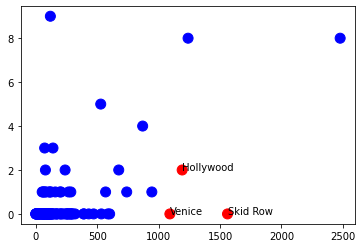

In [62]:
import seaborn as sb
import matplotlib.pyplot as plt

def needs_hosps(row):
    if row['num_hosps'] <= 2 and row['totUnsheltPeoplePortion']>=1000:
        val = "red"
    else:
        val = "blue"
    return val

neigh_df_merged["needs_hosps"] = neigh_df_merged.apply(needs_hosps, axis=1)
plt.scatter(x=neigh_df_merged["totUnsheltPeoplePortion"], y=neigh_df_merged["num_hosps"], c=neigh_df_merged["needs_hosps"], s=100)

for i in range(len(neigh_df_merged)):
  if neigh_df_merged.loc[i,"needs_hosps"]=="red":
    plt.annotate(neigh_df_merged.loc[i,"name"], (neigh_df_merged.loc[i,"totUnsheltPeoplePortion"], neigh_df_merged.loc[i,"num_hosps"]))
plt.show()
# sb.regplot(x = "totUnsheltPeoplePortion", y ="num_hosps", ci = None, data = neigh_df_merged )

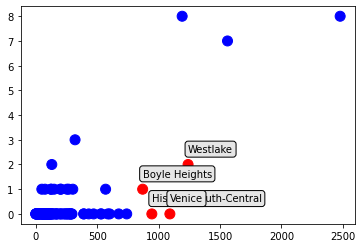

In [86]:

def needs_shelters(row):
    if row['num_shelters'] <= 2 and row['totUnsheltPeoplePortion']>=750:
        val = "red"
    else:
        val = "blue"
    return val

neigh_df_merged["needs_shelters"] = neigh_df_merged.apply(needs_shelters, axis=1)
plt.scatter(x=neigh_df_merged["totUnsheltPeoplePortion"], y=neigh_df_merged["num_shelters"], c=neigh_df_merged["needs_shelters"], s=100)

for i in range(len(neigh_df_merged)):
  if neigh_df_merged.loc[i,"needs_shelters"]=="red":
    plt.annotate(neigh_df_merged.loc[i,"name"],
                 (neigh_df_merged.loc[i,"totUnsheltPeoplePortion"], neigh_df_merged.loc[i,"num_shelters"]+0.5),
                 bbox = dict(
                     boxstyle = "round", fc ="0.9"
                 ))
    
# plt.text(fontdict=dict(size = 10))
plt.show()


# sb.regplot(x = "totUnsheltPeoplePortion", y ="num_shelters", ci = None, data = neigh_df_merged )

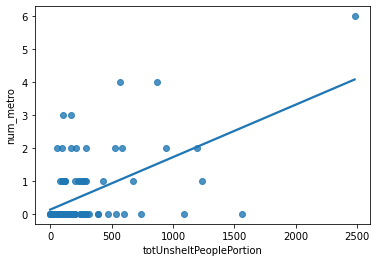

In [52]:
sb.regplot(x = "totUnsheltPeoplePortion", y ="num_metro", ci = None, data = neigh_df_merged )

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [35]:
X = neigh_df_merged[features]
y = neigh_df_merged["totUnsheltPeoplePortion"]


X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.2,random_state =1)
X_train.shape

lr  = LinearRegression().fit(X_train, Y_train)
print(lr.score(X_test,Y_test))
preds = lr.predict(X_test)
mean_squared_error(Y_test, preds)

0.3217265397797472


189982.5860150956

In [108]:
for i,v in corr.iteritems():
  print(i,v)

totUnsheltPeople 0.9999999999999999
totMakeshift 0.8878633636382719
IndMakeshiftPeople 0.8753326129645164
totMakeshiftPeople 0.8734103266199715
totPeople 0.8624488081178663
FamMakeshiftHH 0.850634144507582
totStreetSingAdult 0.8423074907143671
FamMakeshiftPeople 0.8383771275834266
FamTentHH 0.6735222354658377
totTentPeople 0.6718895484088996
FamTentPeople 0.6715379316681437
totTents 0.6657944026401137
IndTentPeople 0.6644099024026138
totCamperPeople 0.5033024781923355
IndCamperPeople 0.49311392633234047
totCampers 0.48087735085991573
IndVanPeople 0.4653259365063112
totVanPeople 0.46530770293654117
totVans 0.46428585096053054
FamCamperHH 0.45161427747886046
FamCamperPeople 0.43446182229608626
totCars 0.4225384463653501
totCarPeople 0.4223866059218693
IndCarPeople 0.4200245430253755
FamVanPeople 0.33436289915984985
DemogSurvCt 0.3309797680057508
SD -0.31969399475348165
FamVanHH 0.27240089070608453
FamCarHH 0.2657028790054597
FamCarPeople 0.2608444042560445
YouthSurvCt 0.2169261869713338


In [ ]:
len(homeless_facilities_df)

36

In [135]:
homeless_la_df = pd.read_csv("HomelessLA/Homelessness_Multi_Year_Final.csv")
homeless_la_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,Survey_Year,Birth_Year,Age,Gender,Ethnicity,Race_Full,Race_Recode,Veteran,Chronic_Time,...,Physical_Disability,Mental_Illness,Alcohol_Abuse,Drug_Abuse,Drug_Alcohol_History,HIV_Positive,Part_Time,Full_Time,Unemployed_Looking,Unemployed_Not_Looking
0,1,Unsheltered 2011,1993.0,18.0,Female,European American,White,European American,0,0,...,0,0,0.0,0.0,1,0,0.0,0.0,1.0,0.0
1,2,Unsheltered 2011,1964.0,46.0,Female,African American,Black-African-American,African American,0,0,...,0,1,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,3,Unsheltered 2011,1956.0,55.0,Male,European American,White,European American,0,1,...,1,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0
3,4,Unsheltered 2011,1960.0,50.0,Male,European American,White,European American,1,1,...,0,0,1.0,0.0,1,0,0.0,0.0,1.0,0.0
4,5,Unsheltered 2011,1979.0,31.0,Male,Latino,BLANK,Unknown,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0


In [117]:
homeless_la_df.columns

Index(['Unnamed: 0', 'Survey_Year', 'Birth_Year', 'Age', 'Gender', 'Ethnicity',
       'Race_Full', 'Race_Recode', 'Veteran', 'Chronic_Time',
       'Chronic_Condition', 'Chronic', 'Adult_With_Child',
       'Times_Homeless_3yrs', 'Times_Homeless_Past_Year',
       'Current_Stint_Duration', 'SPA', 'Census_Tract',
       'Physical_Sexual_Abuse', 'Physical_Disability', 'Mental_Illness',
       'Alcohol_Abuse', 'Drug_Abuse', 'Drug_Alcohol_History', 'HIV_Positive',
       'Part_Time', 'Full_Time', 'Unemployed_Looking',
       'Unemployed_Not_Looking'],
      dtype='object')

In [118]:
homeless_la_df.Chronic.value_counts()

0.0    54814
1.0    17361
Name: Chronic, dtype: int64

In [136]:
len(homeless_la_df)

73153

In [119]:
from sklearn.preprocessing import OneHotEncoder

In [131]:
# features = ['Age','Veteran', 'Chronic_Time',
#        'Chronic_Condition', 'Adult_With_Child','Physical_Sexual_Abuse', 'Physical_Disability', 'Mental_Illness',
#        'Alcohol_Abuse', 'Drug_Abuse', 'Drug_Alcohol_History', 'HIV_Positive',
#        'Part_Time', 'Full_Time', 'Unemployed_Looking',
#        'Unemployed_Not_Looking']


# homeless_la_df.dropna(inplace= True)
# for col in features:
#   homeless_la_df[col] = homeless_la_df[col].fillna( homeless_la_df[col].mode())

# X = homeless_la_df[features]
# Y = homeless_la_df["Chronic"]
# X.head()

,Age,Veteran,Chronic_Time,Chronic_Condition,Adult_With_Child,Physical_Sexual_Abuse,Physical_Disability,Mental_Illness,Alcohol_Abuse,Drug_Abuse,Drug_Alcohol_History,HIV_Positive,Part_Time,Full_Time,Unemployed_Looking,Unemployed_Not_Looking
3592,28.0,0,1,1.0,0,0.0,0,0,1.0,1.0,1,0,0.0,0.0,0.0,0.0
3594,62.0,0,1,0.0,0,0.0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,1.0
3600,28.0,0,1,0.0,0,0.0,0,0,0.0,0.0,1,0,0.0,0.0,0.0,0.0
3601,17.0,0,1,0.0,0,1.0,0,0,0.0,0.0,1,0,0.0,0.0,0.0,0.0
3602,24.0,0,1,1.0,0,1.0,0,0,0.0,0.0,1,0,0.0,0.0,0.0,0.0


In [137]:
import math
def preprop(data,  na_thresh = 0.8):
    log = []
    report = getStats(data)
    # print(report)
    replace_index = {}
    for i in report:
        # print(i)
        if i == "uncertain":            # report has a class of uncertain columns; Do nothing to them
            continue
            
        #If in any column, more than threshold percentage is empty, drop such columns
        if (report[i]["type"] == 'num' or report[i]["type"] == 'cat') and report[i]["na"] >= na_thresh :
            print("Dropping",i,report[i]["na"])
            data = data.drop(i, axis=1)
            
        else:
            data[i] = data[i].fillna(data[i].value_counts().index[0])

            # If column is categorical, encode them with numerical classes    
            if report[i]["type"] == 'cat' and i in data.columns:
                replace_index[i] = getEncodings(data[i])

    data = data.replace(replace_index)
    return data, log, replace_index # Returning cleaned data, log of changes made and categorical encodings dict (if any)



def getEncodings(o):
    o = list(set(o))
    print(o)
    o = sorted(o)
    enc = {cls: ind for ind, cls in enumerate(o)}
    return enc


def getStats(data):
    cols = data.columns
    report = {}
    report['uncertain'] = []
    for i in cols:
        report[i] = {}
        report[i]["na"] = data[i].isna().sum() / len(data)
        if "unique" in str(data[i].describe()):
            if len(data[i].unique()) <  0.25 * len(data):
                report[i]["type"] = "cat"
                report[i]["uniq"] = data[i].unique()
                report[i]["uniq_no"] = len(data[i].unique())
            else:
                report["uncertain"].append(i)
        else:
            report[i]["type"] = "num"
    return report

df_prepro, logs, encs = preprop(homeless_la_df)  


['Unsheltered 2017', 'Sheltered 2017', 'Sheltered 2015', 'Unsheltered 2013', 'Sheltered 2016', 'Sheltered 2013', 'Unsheltered 2011', 'Unsheltered 2015', 'Unsheltered 2016']
['Transgender', 'Female', 'Male', 'Unknown']
['Unknown', 'Latino', 'African American', 'European American', 'Other Ethnicity']
['Black/African-American|White                      ', '(Black or African American,Native Hawaiian or Other Pacific Islander,White,Other)', '(Black or African American,Asian)', 'US Indian/Alaska Native', '(Black/African American,White)', 'Black/African-American                            ', 'Black/African-American|Asian', 'US Indian/Alaska Native                           ', 'Native-Hawaiin-Pacific-Islander', 'White', '(White,American Indian/Alaskan Native)', 'Something else', 'Hispanic / Latino', '(Native Hawaiian or Other Pacific Islander,Other)', '(Native Hawaiian or Other Pacific Islander,White)', 'Pacific Islander', '(Black or African American,White,Other)', 'White|US Indian/Alaska Nati

In [138]:
df_prepro.columns,len(df_prepro)

(Index(['Unnamed: 0', 'Survey_Year', 'Birth_Year', 'Age', 'Gender', 'Ethnicity',
        'Race_Full', 'Race_Recode', 'Veteran', 'Chronic_Time',
        'Chronic_Condition', 'Chronic', 'Adult_With_Child',
        'Times_Homeless_3yrs', 'Times_Homeless_Past_Year',
        'Current_Stint_Duration', 'SPA', 'Census_Tract',
        'Physical_Sexual_Abuse', 'Physical_Disability', 'Mental_Illness',
        'Alcohol_Abuse', 'Drug_Abuse', 'Drug_Alcohol_History', 'HIV_Positive',
        'Part_Time', 'Full_Time', 'Unemployed_Looking',
        'Unemployed_Not_Looking'],
       dtype='object'), 73153)

In [139]:
df_prepro["Chronic"].value_counts()

0.0    55792
1.0    17361
Name: Chronic, dtype: int64

In [140]:
g = df_prepro.groupby('Chronic')
df_prepro_2 =g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df_prepro_2["Chronic"].value_counts()

0.0    17361
1.0    17361
Name: Chronic, dtype: int64

In [143]:
X = df_prepro.drop("Chronic", axis=1)
y = df_prepro["Chronic"]

X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.2,random_state =1)
X_train.shape

model = SVC()
model.fit(X_train,Y_train)

svm_preds = model.predict(X_test)
accuracy_score(Y_test,svm_preds)

0.7630373863714032

In [ ]:
from matplotlib import pyplot as plt
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

model = SVC(kernel = 'linear')
model.fit(X_train,Y_train)
features_names = X.columns.tolist()
f_importances(model.coef_, features_names)

In [ ]:
corr = df_prepro.corrwith(df_prepro["Chronic"]) 
corr= corr.sort_values(ascending=False,key = lambda x : abs(x))
correlated_features = corr[:10].index.tolist()

X = df_prepro[correlated_features].drop("Chronic", axis=1)
y = df_prepro["Chronic"]

X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.2,random_state =1)
X_train.shape

model = SVC()
model.fit(X_train,Y_train)

svm_preds = model.predict(X_test)
accuracy_score(Y_test,svm_preds)

0.7630373863714032

In [ ]:
correlated_features

['Chronic',
 'Chronic_Condition',
 'Chronic_Time',
 'Physical_Disability',
 'Mental_Illness',
 'Current_Stint_Duration',
 'Drug_Alcohol_History',
 'Unnamed: 0',
 'Birth_Year',
 'Alcohol_Abuse']

In [123]:
homeless_la_df.Chronic_Time.value_counts()

1    7453
0    2919
Name: Chronic_Time, dtype: int64

In [ ]:

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state =1)
X_train.shape

(8297, 16)

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
model = SVC()
model.fit(X_train,Y_train)

svm_preds = model.predict(X_test)
accuracy_score(Y_test,svm_preds)

0.9489156626506025